#### Discretization 

Discretisation is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that span the range of the variable's values. Discretisation is also called binning, where bin is an alternative name for interval.

**Why it is important?**

Mathematical problems with continuous data have an infinite number of degrees of freedom. Such a problem would entail having limited degrees of freedom (DoF) since our calculations cannot go on forever. Data Scientists require using Discretization for a number of reasons. Many of the top contributions on Kaggle use discretization for some of the following reasons:

**- Problem Statement**

for instance: Under 100 lbs (light), between 140–160 lbs (mid), and over 200 lbs (heavy)
We would consider the structure useful if we see no objective difference between variables falling under the same weight class.
In our example, weights of 85 lbs and 56 lbs convey the same information (the object is light). Therefore, discretization helps make our data easier to understand if it fits the problem statement.

**-Interprets features**

Continuous features have a smaller chance of correlating with the target variable due to infinite degrees of freedom and may have a complex non-linear relationship. Thus, it may be harder to interpret an such a function. After discretizing a variable, groups corresponding to the target can be interpreted.

**- Incompatible with models/methods**

Certain models may be incompatible with continuous data, for example, alternative decision-tree models such as a Random-Forest model is not suitable for continuous features.
Feature engineering methods, for example any entropy-based methods may not work with continuous data, thus we would discretize variables to work with different models & methods.

**-Signal-to-Noise Ratio**

When we discretize a model, we are fitting it to bins and reducing the impact of small fluctuation in the data. Often, we would consider small fluctuations as noise. We can reduce this noise through discretization. This is the process of “smoothing”, wherein each bin smoothens fluctuations, thus reducing noise in the data.


*Discretisation helps handle outliers and may improve value spread in skewed variables*
Discretisation helps handle outliers by placing these values into the lower or higher intervals, together with the remaining inlier values of the distribution. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval / bucket. In addition, by creating appropriate bins or intervals, discretisation can help spread the values of a skewed variable across a set of bins with equal number of observations.


##### Approaches to Discretization:

**- Unsupervised**
- Equal Width
- EqualFrequency
- KMeans

**- Supervised**
 - Decision Trees


#### Equal width discretisation

Equal width discretisation divides the scope of possible values into N bins of the same width.The width is determined by the range of values in the variable and the number of bins we wish to use to divide the variable:

$ width = \frac{(max value - min value)}{N}  $

where N is the number of bins or intervals.

For example if the values of the variable vary between 0 and 100, we create 5 bins like this: width = (100-0) / 5 = 20. The bins thus are 0-20, 20-40, 40-60, 80-100. The first and final bins (0-20 and 80-100) can be expanded to accommodate outliers (that is, values under 0 or greater than 100 would be placed in those bins as well).

There is no rule of thumb to define N, that is something to determine experimentally.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

In [2]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('../datasets/titanic.csv', usecols=['age', 'fare', 'survived'])

data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (916, 2), Test: (393, 2)


The variables Age and fare contain missing data, that I will fill by extracting a random sample of the variable.

In [4]:
def impute_na(data, variable):
    df = data.copy()
    # random sampling
    df[variable + '_random'] = df[variable]

    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + '_random'] = random_sample

    return df[variable + '_random']

In [5]:
# replace NA in both train and test sets

X_train['age'] = impute_na(X_train, 'age')
X_test['age'] = impute_na(X_test, 'age')

X_train['fare'] = impute_na(X_train, 'fare')
X_test['fare'] = impute_na(X_test, 'fare')

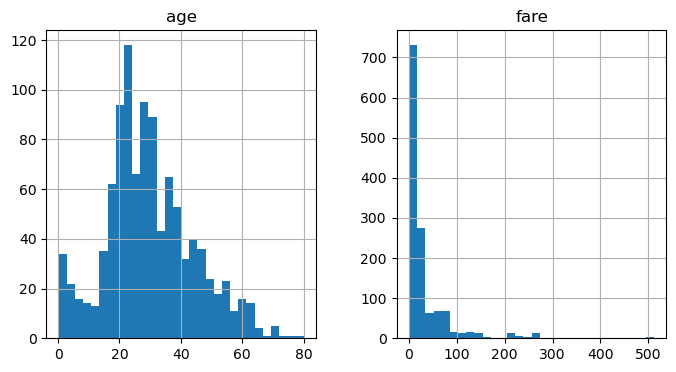

In [6]:
# let's explore the distribution of age

data[['age', 'fare']].hist(bins=30, figsize=(8,4))
plt.show()

**Equal width discretisation**

First we need to determine the intervals' edges or limits.

In [7]:
# let's capture the range of the variable age

age_range = X_train['age'].max() - X_train['age'].min()

print(f"age range: {age_range}")
print(f"age range divided int 8 bins: {age_range/8}")


age range: 73.8333
age range divided int 8 bins: 9.2291625


In [8]:
# now let's capture the lower and upper boundaries

min_value = int(np.floor( X_train['age'].min()))
max_value = int(np.ceil( X_train['age'].max()))

# let's round the bin width
inter_value = int(np.round(age_range / 8))

min_value, max_value, inter_value

(0, 74, 9)

In [9]:
# let's capture the interval limits, so we can pass them to the pandas cut 
# function to generate the bins

intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]

intervals

[0, 9, 18, 27, 36, 45, 54, 63, 72, 81]

In [10]:
# let's make labels to label the different bins

labels = ['Bin_' + str(i) for i in range(1, len(intervals))]

labels

['Bin_1',
 'Bin_2',
 'Bin_3',
 'Bin_4',
 'Bin_5',
 'Bin_6',
 'Bin_7',
 'Bin_8',
 'Bin_9']

In [11]:
# create binned age / discretise age

# create one column with labels
X_train['Age_disc_labels'] = pd.cut(x=X_train['age'],
                                    bins=intervals,
                                    labels=labels,
                                    include_lowest=True)

# and one with bin boundaries
X_train['Age_disc'] = pd.cut(x=X_train['age'],
                             bins=intervals,
                             include_lowest=True)

X_train.head(10)

,age,fare,Age_disc_labels,Age_disc
501,13.0,19.5000,Bin_2,"(9.0, 18.0]"
588,4.0,23.0000,Bin_1,"(-0.001, 9.0]"
402,30.0,13.8583,Bin_4,"(27.0, 36.0]"
1193,40.5,7.7250,Bin_5,"(36.0, 45.0]"
686,22.0,7.7250,Bin_3,"(18.0, 27.0]"
971,39.0,7.8792,Bin_5,"(36.0, 45.0]"
117,30.0,56.9292,Bin_4,"(27.0, 36.0]"
540,2.0,26.0000,Bin_1,"(-0.001, 9.0]"
294,49.0,110.8833,Bin_6,"(45.0, 54.0]"
261,35.0,26.2875,Bin_4,"(27.0, 36.0]"


We can see in the above output how by discretising using equal width, we placed each Age observation within one interval / bin. For example, age=13 was placed in the 9-18 interval, whereas age 30 was placed into the 27-36 interval.

When performing equal width discretisation, we guarantee that the intervals are all of the same length, however there won't necessarily be the same number of observations in each of the intervals. See below:

In [20]:
X_train.groupby('Age_disc')['age'].count()

Age_disc
(-0.001, 9.0]     64
(9.0, 18.0]       88
(18.0, 27.0]     279
(27.0, 36.0]     229
(36.0, 45.0]     120
(45.0, 54.0]      78
(54.0, 63.0]      43
(63.0, 72.0]      14
(72.0, 81.0]       1
Name: age, dtype: int64

In [13]:
X_train['age'].value_counts
# X_train.groupby('Age_disc')['age'].count().plot.bar(x='Age_disc')
# plt.xticks(rotation=45)
# plt.ylabel('Number of observations per bin')

<bound method IndexOpsMixin.value_counts of 501     13.0000
588      4.0000
402     30.0000
1193    40.5000
686     22.0000
         ...   
763      0.1667
835     25.0000
1216    67.0000
559     20.0000
684     32.0000
Name: age, Length: 916, dtype: float64>

In [14]:
X_test['Age_disc_labels'] = pd.cut(x=X_test['age'],
                                   bins=intervals,
                                   labels=labels,
                                   include_lowest=True)


X_test['Age_disc'] = pd.cut(x=X_test['age'],
                            bins=intervals,
                            include_lowest=True)

X_test.head()

,age,fare,Age_disc_labels,Age_disc
1139,38.0,7.8958,Bin_5,"(36.0, 45.0]"
533,21.0,21.0000,Bin_3,"(18.0, 27.0]"
459,42.0,27.0000,Bin_5,"(36.0, 45.0]"
1150,3.0,14.5000,Bin_1,"(-0.001, 9.0]"
393,25.0,31.5000,Bin_3,"(18.0, 27.0]"


In [27]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

t1 = X_train.groupby(['Age_disc'])['age'].count() / len(X_train)
t2 = X_test.groupby(['Age_disc'])['age'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

tmp.plot(kind='bar')
# plt.xticks(rotation=45)
# plt.ylabel('Number of observations per bin')